In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

[Property Assessment History (CSV)](https://opendataphilly.org/datasets/philadelphia-properties-and-assessment-history/)

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
opa = pd.read_csv('../data/opa_properties_public.csv', 
                  low_memory=False)

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
opa_corr = opa.copy(deep=True)

non_numeric_columns = opa_corr.select_dtypes(include=['O']).columns

for column in non_numeric_columns:
    opa_corr[column] = le.fit_transform(opa_corr[column].astype(str))

print(opa_corr.head())


    objectid  assessment_date  basements  beginning_point  book_and_page  \
0  301473952            20959         15           415298         495375   
1  301473953            20961         15           376043         495375   
2  301473954                1         15           421721         495375   
3  301473955            20959         15            13395         495375   
4  301473956            20959         15            33392         495375   

   building_code  building_code_description  category_code  \
0            597                        423              6   
1            597                        423              6   
2            621                        790              6   
3            597                        423              6   
4            597                        423              6   

   category_code_description  census_tract  central_air  cross_reference  \
0                         17           2.0            4              NaN   
1                 

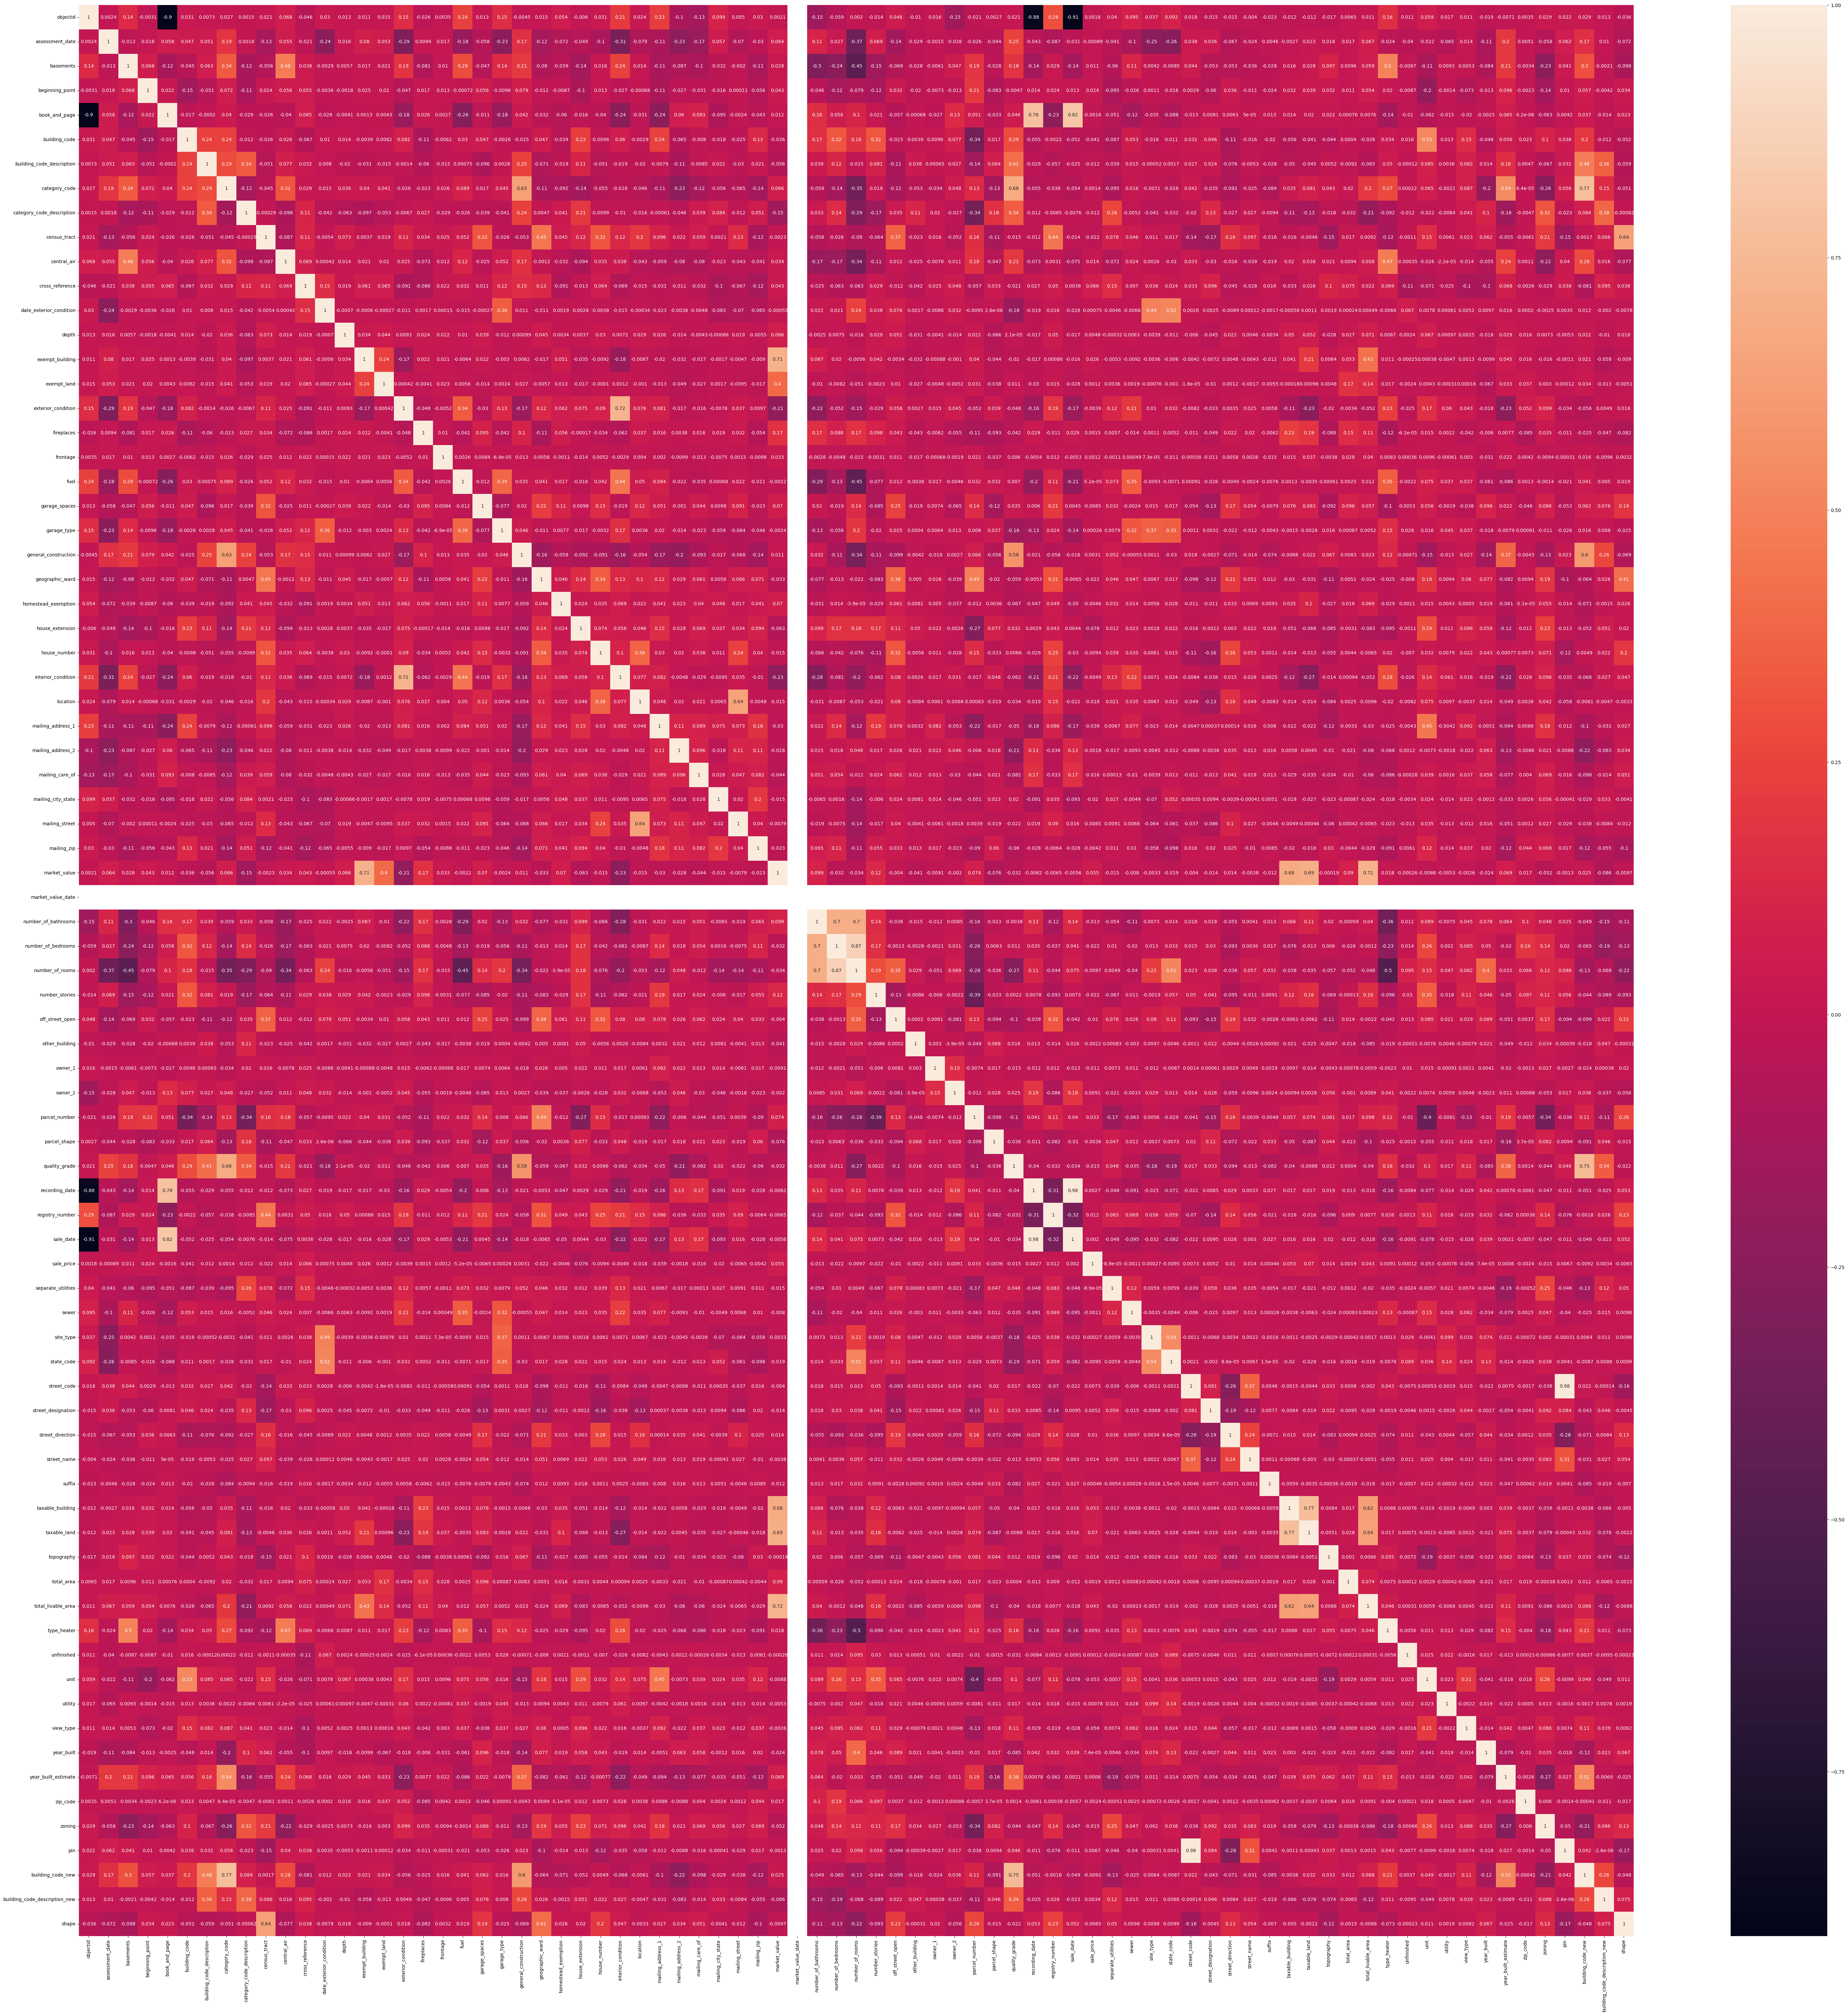

In [91]:
plt.figure(figsize=(75, 75))
sns.heatmap(opa_corr.corr(), annot=True)
plt.show()

In [94]:
opa.assessment_date.dropna().sort_values()

125325    1949-01-01 00:00:00-05:00
292475    2021-07-16 18:15:31-04:00
361874    2021-07-16 18:15:31-04:00
361873    2021-07-16 18:15:31-04:00
361872    2021-07-16 18:15:31-04:00
                    ...            
292876    2023-05-03 16:36:21-04:00
315679    2023-05-03 16:38:12-04:00
249766    2023-05-03 16:40:34-04:00
288379    2023-05-03 16:46:32-04:00
313450    2023-05-03 16:49:18-04:00
Name: assessment_date, Length: 576611, dtype: object

In [99]:
fires2019 = pd.read_csv('D:/Fire Project/data/USFA NFIRS 2019 Hazmat/NFIRS_FIRES_2019_011921/incidentaddress.txt', 
                            sep='^',
                            low_memory=False,
                            encoding='ISO-8859-1')

In [111]:
philly_mask = fires2019.CITY.str.lower() == 'philadelphia'
pa_mask = fires2019.STATE == 'PA'

philly_fires19 = fires2019[philly_mask & pa_mask]

In [112]:
philly_fires19

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,LOC_TYPE,NUM_MILE,STREET_PRE,STREETNAME,STREETTYPE,STREETSUF,APT_NO,CITY,STATE_ID,ZIP5,ZIP4,X_STREET
1721088,PA_46128_01192019_22_0,PA,46128,1192019,22,0,1,221,NaN,NORTHWESTERN,AVE,NaN,NaN,PHILADELPHIA,PA,19128,NaN,DEAD END AND RIDGE AVE
1721147,PA_46128_05132019_162_0,PA,46128,5132019,162,0,1,8833,NaN,STENTON,AVE,NaN,NaN,PHILADELPHIA,PA,19118,NaN,NEWTON ST AND BETHLEHEM PIKE
1722999,PA_46176_04162019_073_0,PA,46176,4162019,073,0,1,NaN,NaN,FALLS,BRG,NaN,NaN,PHILADELPHIA,PA,19129,NaN,FALLS BRG AND MARTIN LUTHER KI
1723665,PA_46328_12082019_267_0,PA,46328,12082019,267,0,1,1331,NaN,IVY HILL,RD,NaN,NaN,PHILADELPHIA,PA,19150,NaN,MICHENER AVE AND PROVIDENT RD
1723880,PA_46926_09262019_4823885_0,PA,46926,9262019,4823885,0,1,1809,NaN,CHELTENHAM,AVE,NaN,NaN,PHILADELPHIA,PA,19126,NaN,CEDAR LN AND N 19TH ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742084,PA_51001_12312019_3650651_0,PA,51001,12312019,3650651,0,1,240,NaN,DELANCEY,ST,NaN,NaN,PHILADELPHIA,PA,19106,NaN,NaN
1742085,PA_51001_12312019_3650718_0,PA,51001,12312019,3650718,0,2,NaN,NaN,COTTMAN,NaN,NaN,NaN,PHILADELPHIA,PA,19111,NaN,PENNWAY ST
1742086,PA_51001_12312019_3650785_0,PA,51001,12312019,3650785,0,1,6101,NaN,MORRIS,ST,NaN,NaN,PHILADELPHIA,PA,19144,NaN,NaN
1742087,PA_51001_12312019_3650881_0,PA,51001,12312019,3650881,0,4,9926,NaN,HALDEMAN,NaN,NaN,NaN,PHILADELPHIA,PA,19115,NaN,NaN


1 Street address
2 Intersection
3 In front of
4 Rear of
5 Adjacent to
6 Directions
7 U.S. National Grid

In [113]:
philly_fires19.groupby(by='LOC_TYPE').size()

LOC_TYPE
1    7968
2    2661
3    1067
4     607
5     405
7       1
dtype: int64

In [116]:
philly_fires19_addy = philly_fires19[philly_fires19.LOC_TYPE == 1]
philly_fires19_addy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7968 entries, 1721088 to 1742088
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   INCIDENT_KEY  7968 non-null   object
 1   STATE         7968 non-null   object
 2   FDID          7968 non-null   object
 3   INC_DATE      7968 non-null   int64 
 4   INC_NO        7968 non-null   object
 5   EXP_NO        7968 non-null   int64 
 6   LOC_TYPE      7968 non-null   int64 
 7   NUM_MILE      7967 non-null   object
 8   STREET_PRE    3179 non-null   object
 9   STREETNAME    7968 non-null   object
 10  STREETTYPE    5925 non-null   object
 11  STREETSUF     0 non-null      object
 12  APT_NO        170 non-null    object
 13  CITY          7968 non-null   object
 14  STATE_ID      7968 non-null   object
 15  ZIP5          7968 non-null   object
 16  ZIP4          0 non-null      object
 17  X_STREET      6 non-null      object
dtypes: int64(3), object(15)
memory usage: 1